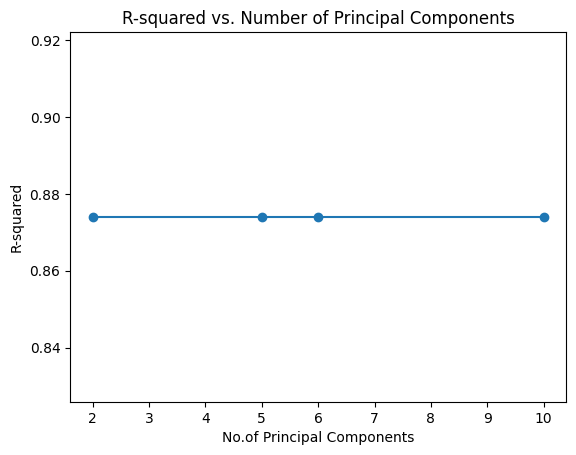

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Wine.csv')
M=data.drop('fixed acidity', axis=1)
n=data['fixed acidity']
M_train,M_test,n_train,n_test = train_test_split(M,n, test_size=0.3, random_state=42)
mdl = LinearRegression()
mdl.fit(M_train,n_train)
n_pred = mdl.predict(M_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(M_train)
X_test_scaled = scaler.transform(M_test)
n_components_list = [2,5,6,10]
accuracies = []
for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_pca,n_train)
    y_pred = model.predict(X_test_pca)
    r2 = r2_score(n_test,n_pred)
    accuracies.append(r2)

plt.plot(n_components_list, accuracies, marker='o')
plt.xlabel('No.of Principal Components')
plt.ylabel('R-squared')
plt.title('R-squared vs. Number of Principal Components')
plt.show()